In [471]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [472]:
df = pd.read_csv(r"C:\Users\Asani\Documents\DATA PELATIHAN\olympics.csv", header=1)
df.head(10)

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria (AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan (AZE),5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas (BAH),15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain (BRN),8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


## Mengubah nama setiap kolom pada data Frame

In [473]:
df.rename(columns={"Unnamed: 0":"Countries",
                   "? Summer":"Summer olympics",
                   "01 !":"Gold1",
                   "02 !":"Silver1",
                   "03 !":"Bronze1",
                   "Total":"Total1",
                   "? Winter":"Winter olympics",
                   "01 !.1":"Gold2",
                   "02 !.1":"Silver2",
                   "03 !.1":"Bronze2",
                   "Total.1":"Total2",
                   "? Games":"Total Games",
                   "01 !.2":"Total Gold",
                   "02 !.2":"Total Silver",
                   "03 !.2":"Total Bronze",
                   "Combined total":"Total Medal"}, inplace=True)
df.columns

Index(['Countries', 'Summer olympics', 'Gold1', 'Silver1', 'Bronze1', 'Total1',
       'Winter olympics', 'Gold2', 'Silver2', 'Bronze2', 'Total2',
       'Total Games', 'Total Gold', 'Total Silver', 'Total Bronze',
       'Total Medal'],
      dtype='object')

## Melakukan Pengecheckan

In [474]:
df.head()

,Countries,Summer olympics,Gold1,Silver1,Bronze1,Total1,Winter olympics,Gold2,Silver2,Bronze2,Total2,Total Games,Total Gold,Total Silver,Total Bronze,Total Medal
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


## Melihat kolom Countries dari nomor index ke-10

In [475]:
df.loc[10:,"Countries"].head(10)

10               Barbados (BAR) [BAR]
11                      Belarus (BLR)
12                      Belgium (BEL)
13                      Bermuda (BER)
14            Bohemia (BOH) [BOH] [Z]
15                     Botswana (BOT)
16                       Brazil (BRA)
17    British West Indies (BWI) [BWI]
18                 Bulgaria (BUL) [H]
19                      Burundi (BDI)
Name: Countries, dtype: object

## Menghapus kurung siku pada kolom "Countries"

In [476]:
def hapus(BAR):
    return re.sub(r"\[.*?\]", "", BAR)


df["Countries"] = df["Countries"].apply(hapus)

## Melakukan pengechekan

In [477]:
df.loc[10:,"Countries"].head(10)

10               Barbados (BAR) 
11                 Belarus (BLR)
12                 Belgium (BEL)
13                 Bermuda (BER)
14               Bohemia (BOH)  
15                Botswana (BOT)
16                  Brazil (BRA)
17    British West Indies (BWI) 
18               Bulgaria (BUL) 
19                 Burundi (BDI)
Name: Countries, dtype: object

## Menghilangkan index 146

In [478]:
df= df.drop(index=[146])

## Menghilangkan spasi pada kolom "Countries"

In [479]:
df["Countries"] = df["Countries"].str.replace(" ","")

df

,Countries,Summer olympics,Gold1,Silver1,Bronze1,Total1,Winter olympics,Gold2,Silver2,Bronze2,Total2,Total Games,Total Gold,Total Silver,Total Bronze,Total Medal
0,Afghanistan(AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria(ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina(ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia(ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Yugoslavia(YUG),16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
142,IndependentOlympicParticipants(IOP),1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia(ZAM),12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe(ZIM),12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


## Memberikan Spasi pada nama Negara yang mempunyai lebih dari satu kalimat

In [480]:
df["Countries"] = df["Countries"].apply(lambda x: re.sub(r"(?<=[a-z)])(?=[A-Z(])|\s(?=\()|\)(?<=\))(?=\w)"," ",x))
df

,Countries,Summer olympics,Gold1,Silver1,Bronze1,Total1,Winter olympics,Gold2,Silver2,Bronze2,Total2,Total Games,Total Gold,Total Silver,Total Bronze,Total Medal
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Yugoslavia (YUG),16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
142,Independent Olympic Participants (IOP),1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia (ZAM),12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe (ZIM),12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


## Melakukan Pengecheckan

In [481]:
df.loc[10:,"Countries"].head(20)

10               Barbados (BAR)
11                Belarus (BLR)
12                Belgium (BEL)
13                Bermuda (BER)
14                Bohemia (BOH)
15               Botswana (BOT)
16                 Brazil (BRA)
17    British West Indies (BWI)
18               Bulgaria (BUL)
19                Burundi (BDI)
20               Cameroon (CMR)
21                 Canada (CAN)
22                  Chile (CHI)
23                  China (CHN)
24               Colombia (COL)
25             Costa Rica (CRC)
26            Ivory Coast (CIV)
27                Croatia (CRO)
28                   Cuba (CUB)
29                 Cyprus (CYP)
Name: Countries, dtype: object

## Melihat kolom mana yang mempunyai nilai kosong

In [482]:
df.isnull().sum()

Countries          0
Summer olympics    0
Gold1              0
Silver1            0
Bronze1            0
Total1             0
Winter olympics    0
Gold2              0
Silver2            0
Bronze2            0
Total2             0
Total Games        0
Total Gold         0
Total Silver       0
Total Bronze       0
Total Medal        0
dtype: int64

## Mengetahui banyak negara yang berpartisipasi pada Summer olympics dan Winter olympics

In [483]:
column1 = df["Summer olympics"]
count1 = column1[column1 == 0]. count()

print("Banyaknya negara yang tidak berpartisipasi pada Summer olympics adalah:", count1)

Banyaknya negara yang tidak berpartisipasi pada Summer olympics adalah: 0


In [484]:
column2 = df["Winter olympics"]
count2 = column2[column2 == 0].count()

print("Banyaknya negara yang tidak berpartisipasi pada Winter olympics adalah:", count2)

Banyaknya negara yang tidak berpartisipasi pada Winter olympics adalah: 45


#### Melihat deskripsi setiap kolom

In [485]:
df.describe()

,Summer olympics,Gold1,Silver1,Bronze1,Total1,Winter olympics,Gold2,Silver2,Bronze2,Total2,Total Games,Total Gold,Total Silver,Total Bronze,Total Medal
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,13.383562,32.938356,32.705479,35.136986,100.780822,6.595890,6.568493,6.561644,6.493151,19.623288,19.979452,39.506849,39.267123,41.630137,120.404110
std,7.006657,96.745184,80.648421,77.118416,252.700436,7.349012,18.975086,18.606996,17.499654,54.640914,13.084062,109.932471,93.984393,89.826117,291.988913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,1.000000,2.250000
50%,13.000000,3.000000,4.000000,6.000000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,4.000000,6.500000,12.000000
75%,18.000000,23.000000,26.750000,28.750000,85.250000,10.000000,0.750000,1.750000,1.000000,4.750000,26.000000,24.500000,28.000000,29.000000,87.750000
max,27.000000,976.000000,757.000000,666.000000,2399.000000,22.000000,118.000000,111.000000,100.000000,329.000000,49.000000,1072.000000,859.000000,750.000000,2681.000000


#### Melihat total medali terbanyak yang diperoleh 

In [486]:
gold=df["Total Gold"].sum()
silver=df["Total Silver"].sum()
bronze=df["Total Bronze"].sum()
print(gold,silver,bronze)

5768 5733 6078


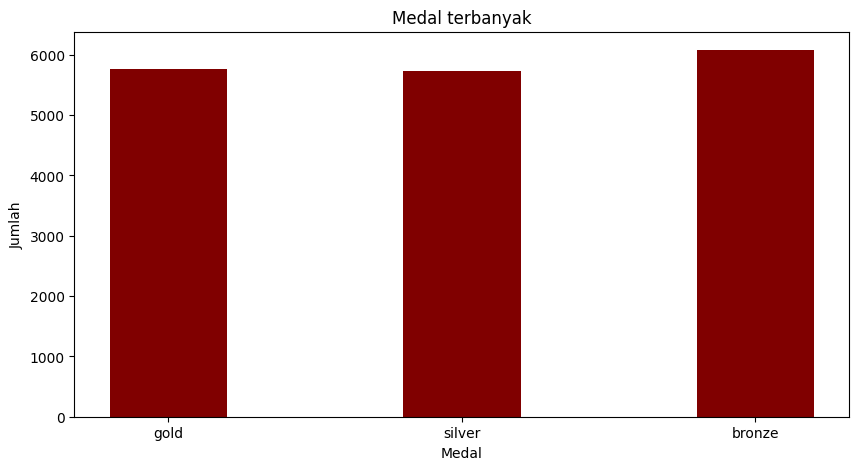

In [487]:
data = {'gold':5768, 'silver':5733, 'bronze':6078
        }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Medal")
plt.ylabel("Jumlah")
plt.title("Medal terbanyak")
plt.show()

In [488]:
df.to_csv("Olympiad Cleansing")